Customer Feedback Prediction Analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,Positive
1,24,Female,Single,Student,Low,Graduate,3,Positive
2,22,Male,Single,Student,Low,Post Graduate,3,Negative
3,22,Female,Single,Student,No Income,Graduate,6,Positive
4,22,Male,Single,Student,Low,Post Graduate,4,Positive


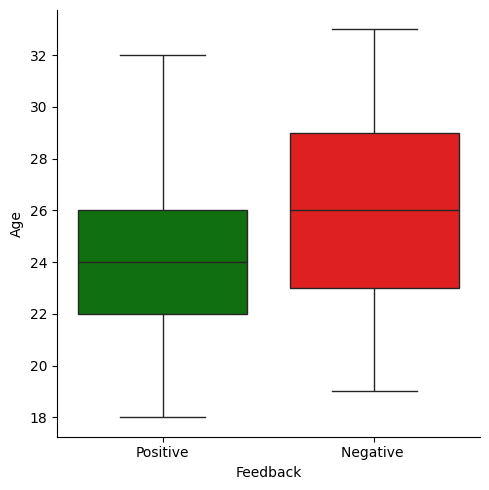

In [3]:
sns.catplot(data=df, x='Feedback', y='Age', kind='box', hue='Feedback', palette = ['green','red'])
plt.show()

Positive feedback has a slighly lower age median around 24, while the negative feedback with a higher median age around 26. The age range in postive feedback is larger compared to negative feedback. This might indicate that younger people have tend to have more positive feedback on online food orders compared to older individuals.

In [4]:
features = df.iloc[:, 0:7]
features.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,20,Female,Single,Student,No Income,Post Graduate,4
1,24,Female,Single,Student,Low,Graduate,3
2,22,Male,Single,Student,Low,Post Graduate,3
3,22,Female,Single,Student,No Income,Graduate,6
4,22,Male,Single,Student,Low,Post Graduate,4


In [5]:
label = df.iloc[:, -1]
label.head()

,Feedback
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive


In [6]:
dm_feature = pd.get_dummies(data=features, drop_first=True, dtype=float)
dm_feature.head()

,Age,Family size,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_Low,Monthly Income_No Income,Monthly Income_Very High,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated
0,20,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,24,3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,22,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,22,4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
train_x, test_x, train_y, test_y = train_test_split(dm_feature, label, test_size=0.2, random_state=24)

In [8]:
NB_model = MultinomialNB()
NB_model.fit(train_x, train_y)

MultinomialNB()

In [9]:
pred_y = NB_model.predict(test_x)
print(pred_y)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative ' 'Positive' 'Positive' 'Positive' 'Negative ' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative ' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [10]:
print(pred_y[0:5])
print(test_y[0:5])

['Positive' 'Positive' 'Positive' 'Positive' 'Positive']
349    Negative 
111     Positive
221     Positive
219     Positive
29      Positive
Name: Feedback, dtype: object


In [11]:
accuracy = accuracy_score(test_y, pred_y)
accuracy

0.8076923076923077